# **Performing EDA Netflix**

Importing modules

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

**Data Reading**

In [ ]:
netflix = pd.read_csv("/content/drive/MyDrive/Dataset/NetflixOriginals.csv", encoding = 'Latin')
netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


**Data Processing**

In [ ]:
netflix["Premiere"] = netflix["Premiere"].str.replace( ".",",")
netflix['Premiere'] = pd.to_datetime(netflix['Premiere'], format='%B %d, %Y')

In [ ]:
netflix['Premiere Year'] = netflix['Premiere'].dt.year
netflix['Premiere Month'] = netflix['Premiere'].dt.month

In [16]:
netflix.duplicated().sum()

0

**Average IMDB score for each genre**

<ipython-input-43-785dfa23725b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




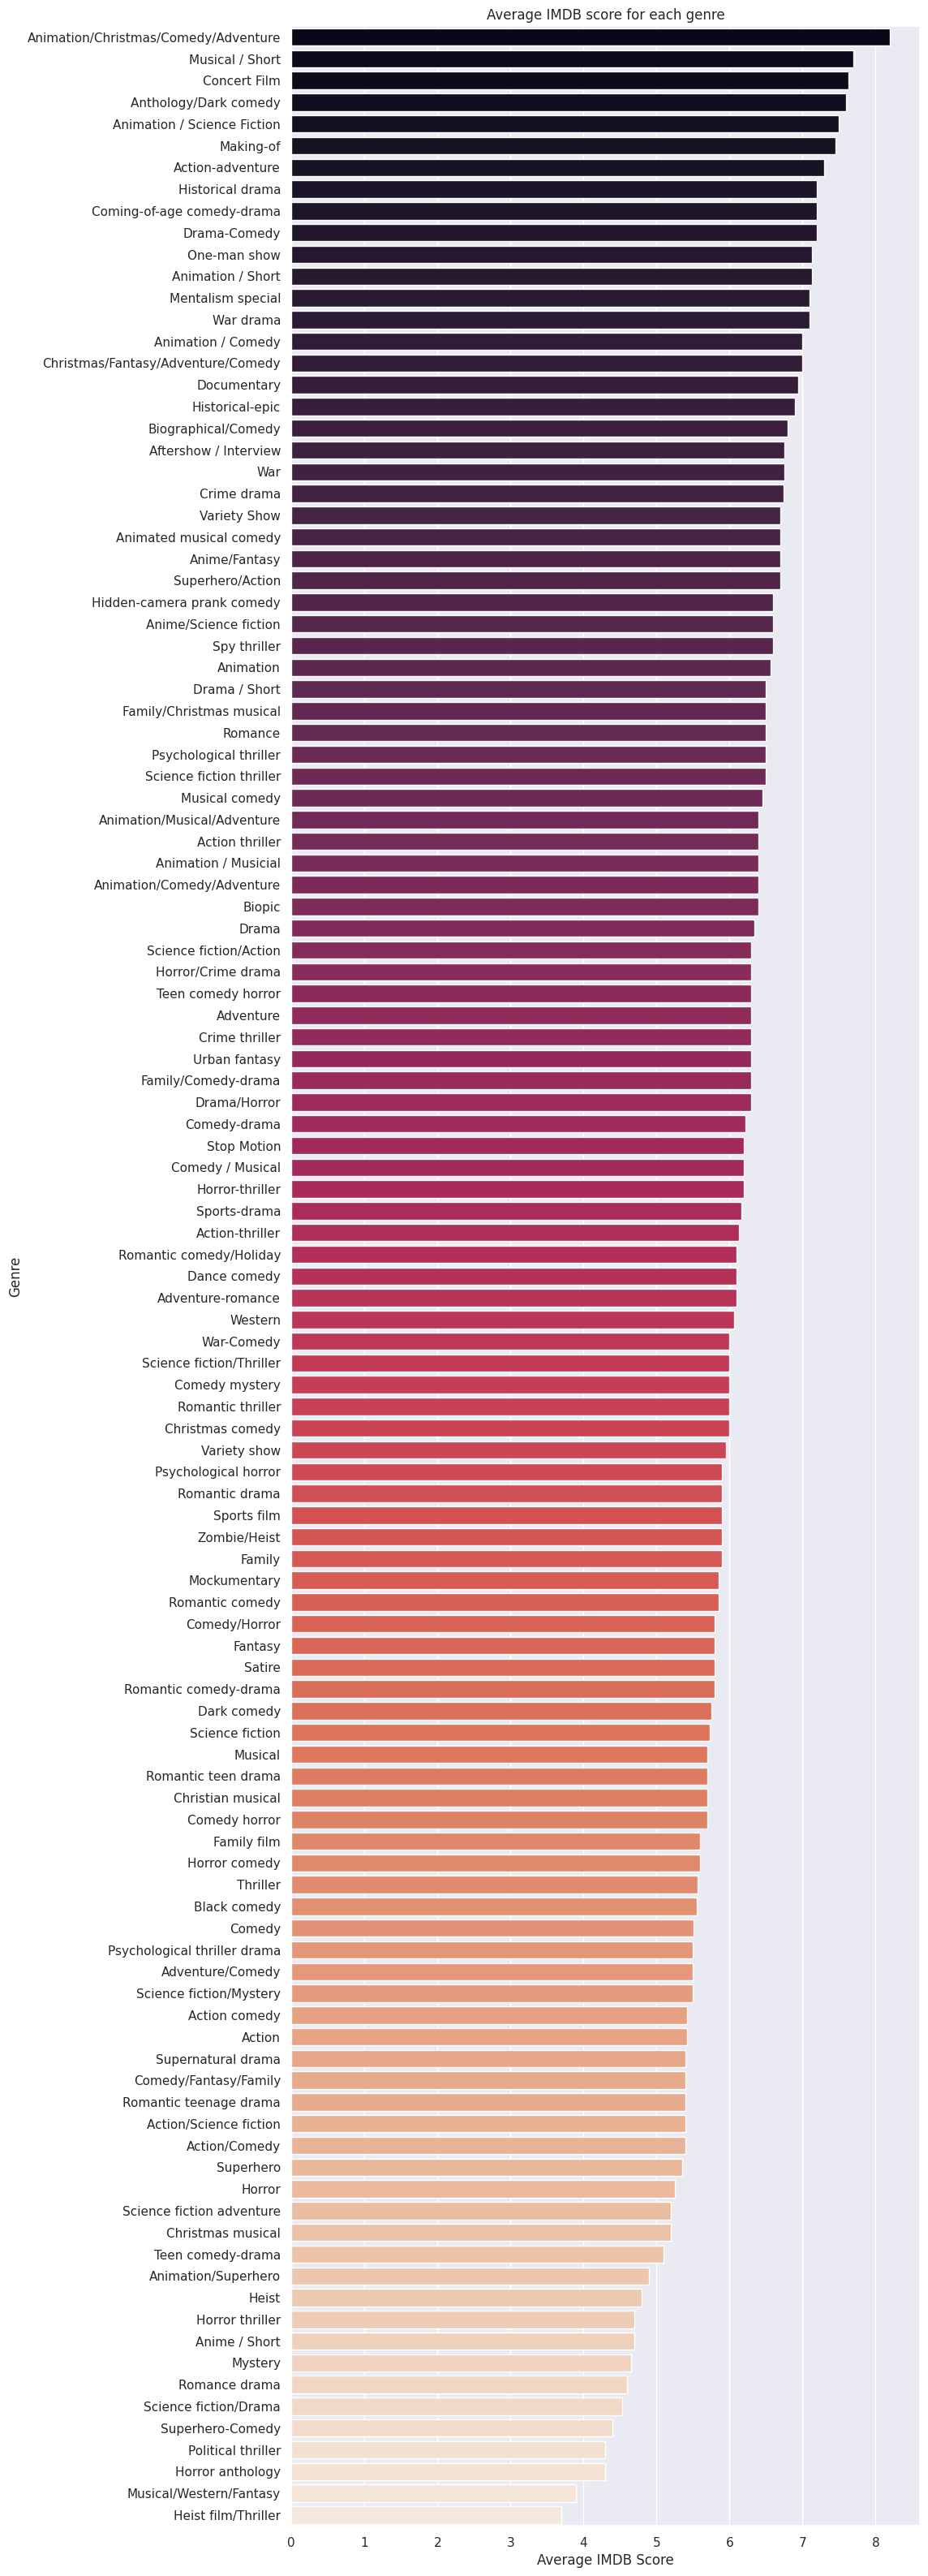

In [43]:
ave = netflix.groupby('Genre').agg({"IMDB Score" : 'mean'}).sort_values(by = "IMDB Score", ascending = False).reset_index()
plt.figure(figsize = (10, 40))
sns.barplot(data = ave, x = "IMDB Score", y = "Genre", palette = 'rocket')
plt.title("Average IMDB score for each genre")
plt.xlabel("Average IMDB Score")
plt.show()

With an average score of 8.20, the Animation/Christmas/Comedy/Adventure genre comes in first, probably because animation films are generally optimistic. Surprisingly, given its condensed shape, Musical/Short has an average score of 7.70, following closely behind. Third place goes to Concert Film, which surprisingly does well because to its immersive experiences. On the other hand, the Heist film/Thriller receives the lowest average score, indicating difficulties in meeting the anticipated level of tension.

**Highest Average Runtime**

In [22]:
har =netflix.groupby('Genre').agg({'Runtime':'mean'}).sort_values(by = 'Runtime', ascending = False).reset_index()
har['Genre'][0:2]

0      Heist film/Thriller
1    Anthology/Dark comedy
Name: Genre, dtype: object

**Longer movies rated higher on IMDB**

In [23]:
px.scatter(data_frame = netflix, x = "Runtime", y = 'IMDB Score', trendline = 'ols')

In [24]:
netflix['Runtime'].corr(netflix["IMDB Score"])

-0.04089629142078858

The correlation coefficient of -0.04 indicates a negligible negative relationship between movie runtime and IMDB score.

**Distribution of movies in different Languages**

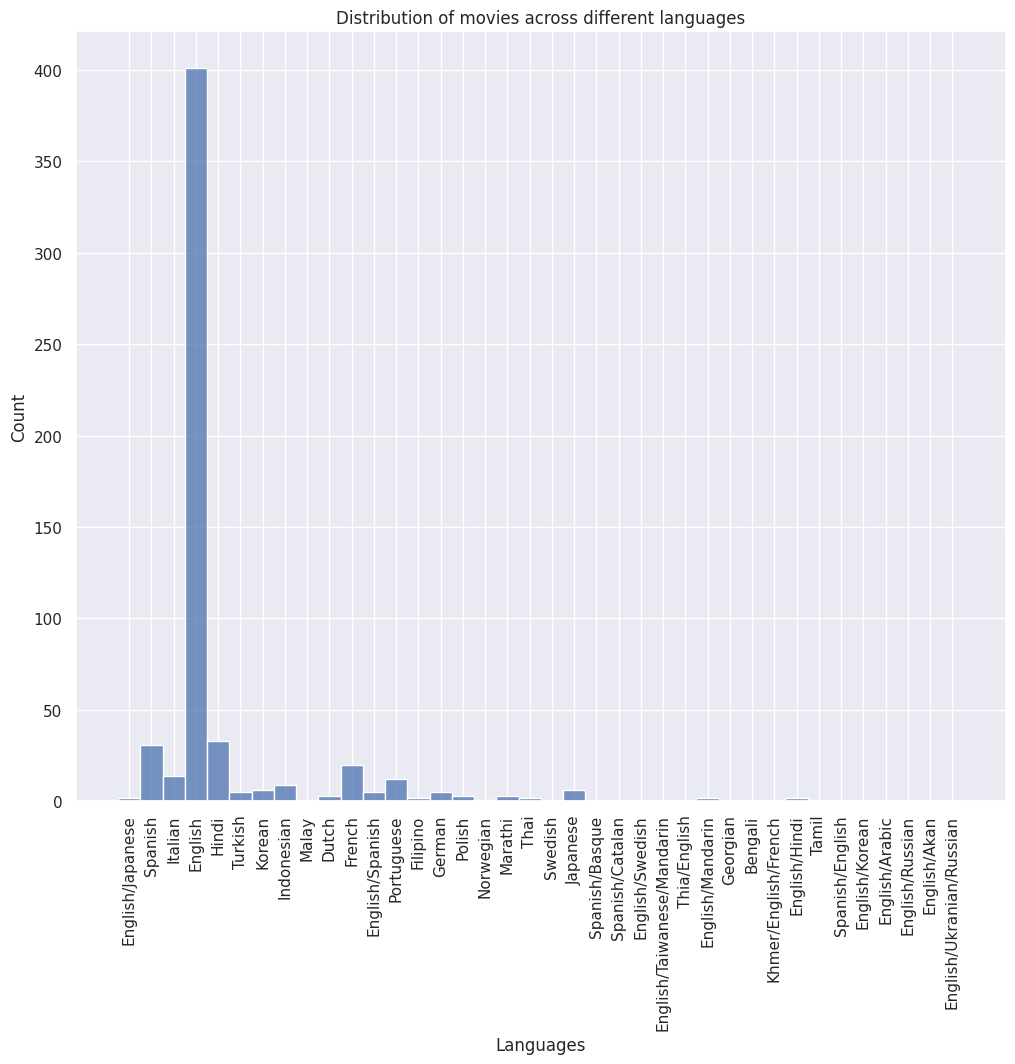

In [31]:
plt.figure(figsize = (12,10))
sns.histplot(netflix,x= "Language")
plt.title("Distribution of movies across different languages")
plt.xlabel("Languages")
plt.xticks(rotation = "vertical")
plt.show()

This shows that english-language movies are most viewed om netflix.

**Trend Release over Years**

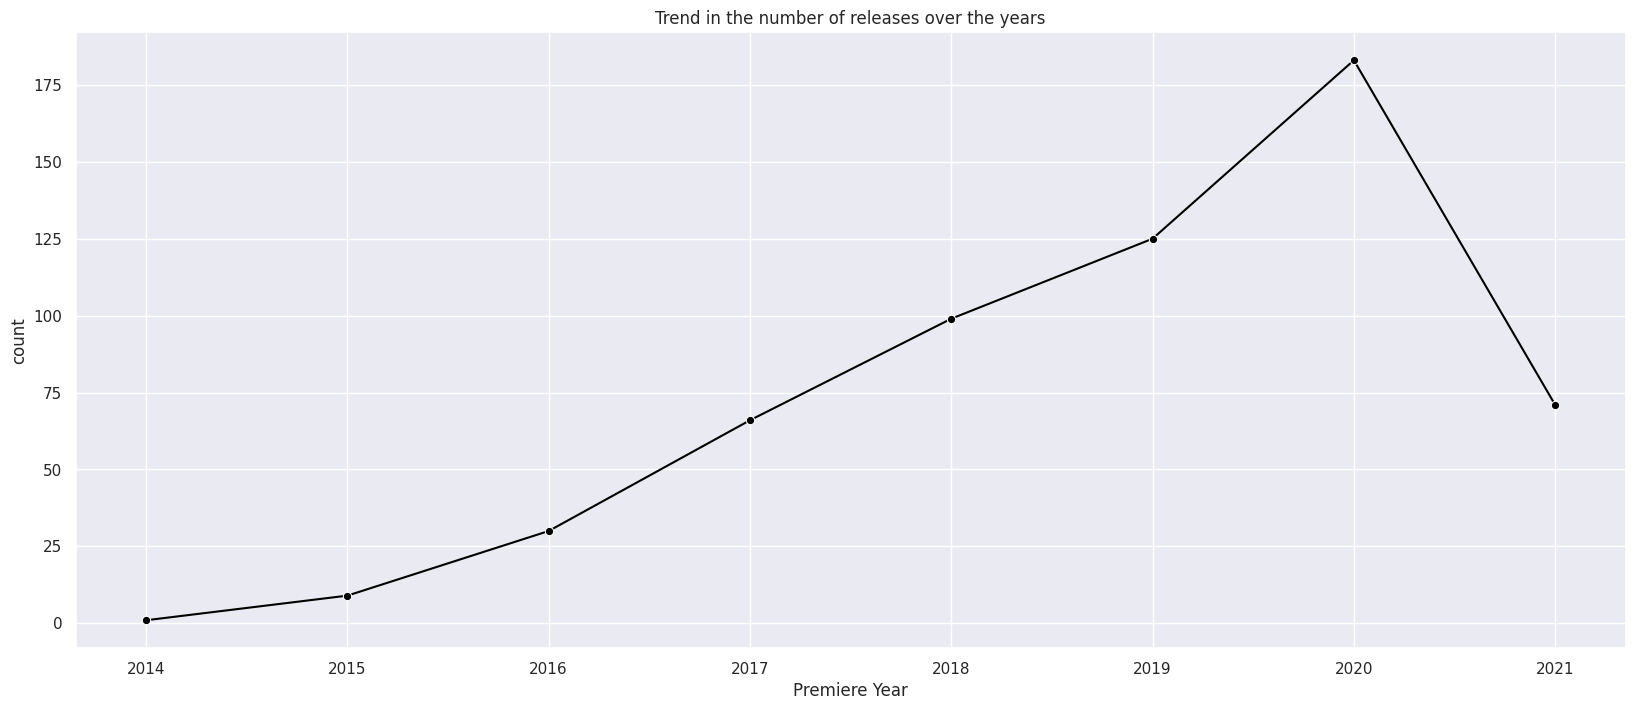

In [32]:
toy = netflix["Premiere Year"].value_counts().reset_index()
plt.figure(figsize = (20,8))
sns.set_theme(style="darkgrid")
sns.lineplot(toy,x= "Premiere Year", y = "count", marker = 'o', color = "black")
plt.title("Trend in the number of releases over the years")
plt.show()

The data shows that in year 2020 stands out with the highest count over the years.

**Highest Average in years,  IMDB Score**

In [33]:
yha = netflix.groupby("Premiere Year").agg({"IMDB Score": "mean"}).sort_values(by = "IMDB Score", ascending = False).reset_index()
yha

,Premiere Year,IMDB Score
0,2015,6.877778
1,2016,6.513333
2,2017,6.422727
3,2014,6.400000
4,2018,6.360606
5,2019,6.259200
6,2020,6.195082
7,2021,6.046479


**Distribution of IMDB Score**

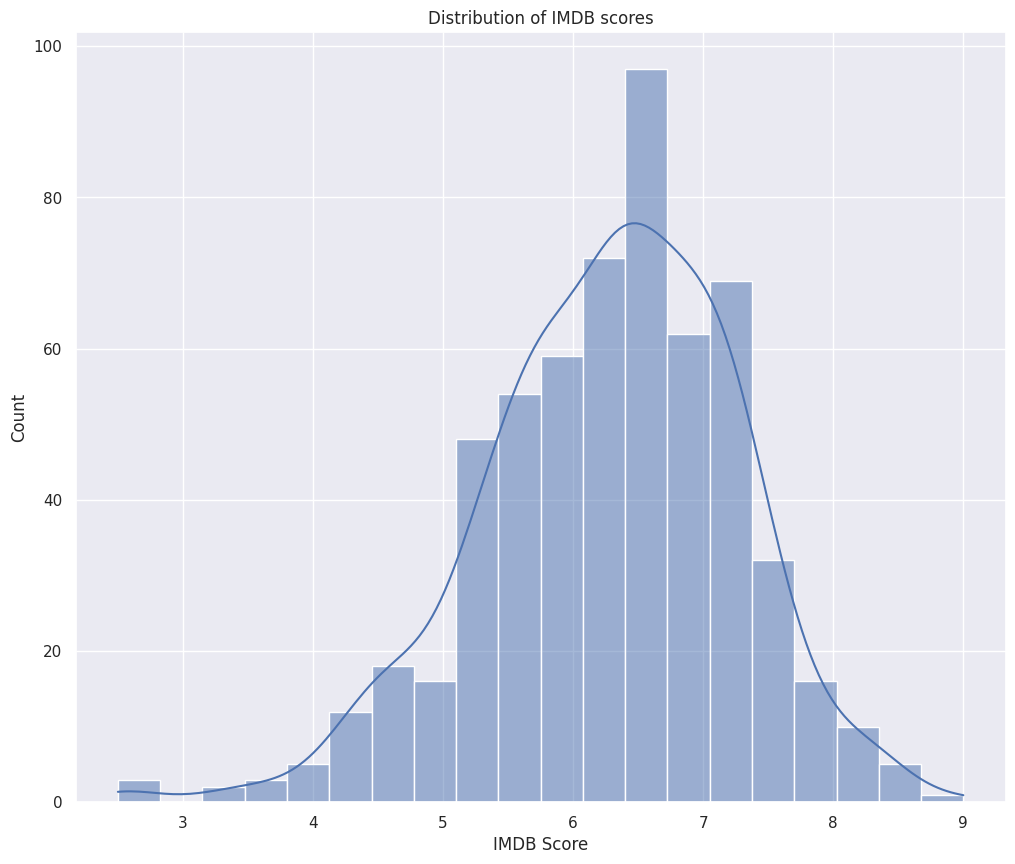

In [35]:
plt.figure(figsize = (12,10))
sns.histplot(netflix,x= "IMDB Score", bins = 20, kde = True)
plt.title("Distribution of IMDB scores")
plt.show()

A noticeable rise in the data can be seen around an IMDb score of 7. A balanced distribution of ratings is suggested by the distribution's apparent symmetry and small bias into lower ratings. The majority of Netflix films are regarded as average to above average, with most receiving scores between 5 and 8. There are also fewer extreme scores (below 4 or over 8), which emphasizes the dearth of excellent or low-rated films.

**Most Common Genre**

In [41]:
mostcommongenre = netflix["Genre"].value_counts().idxmax()
"Most Common Genre is {}".format(mostcommongenre)

'Most Common Genre is Documentary'

**Average Runtime of Movies released in different Months**

<ipython-input-42-3f3fc374414b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




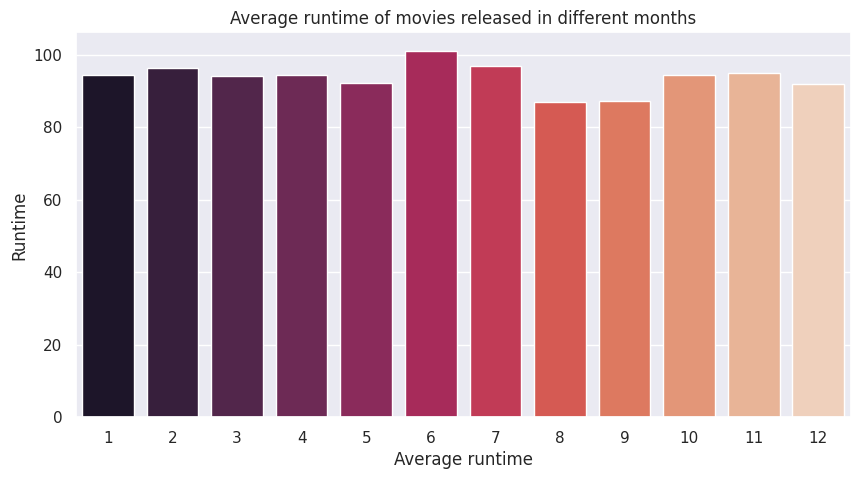

In [42]:
arm = netflix.groupby("Premiere Month").agg({"Runtime": "mean"}).sort_values(by = "Premiere Month").reset_index()
plt.figure(figsize = (10,5))
sns.barplot(data = arm, x = "Premiere Month", y = "Runtime", palette="rocket")
plt.title("Average runtime of movies released in different months")
plt.xlabel("Average runtime")
plt.show()